In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, reading csv files
import matplotlib.pyplot as plt #Plotting and visualization
import seaborn as sns #Some shiny visualizations
import plotly.express as ex #Still more plotting tools

from scipy import stats #Some statistical tools
from sklearn.model_selection import train_test_split #Train-test splitting library
from sklearn.model_selection import KFold #k-fold cross validation
from sklearn.model_selection import cross_val_score #Or, this one-shot method!
#More on this https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html


from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbor classification algorithm
from sklearn.svm import SVC #Support Vector Machines classifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report #Computing the confusion matrix and more

from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import io

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset (3).csv


In [ ]:
dataset_df = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))

In [ ]:
dataset_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15647572,Greece,504,Spain,Male,34,0,54980.81,1,1,1,136909.88,0
1,15797692,Volkova,659,France,Female,33,7,89939.62,1,1,0,136540.09,0
2,15713559,Onyemauchechukwu,473,Germany,Female,32,5,146602.25,2,1,1,72946.95,0
3,15595067,Zhirov,637,Spain,Female,40,6,0.00,2,1,1,181610.60,0
4,15810167,Scott,657,Spain,Male,75,7,126273.95,1,0,1,91673.60,0


In [ ]:
uploaded = files.upload()

Saving judge.csv to judge (2).csv


In [ ]:
judge_df = pd.read_csv(io.BytesIO(uploaded['judge.csv']))
judge_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15605215,Stevenson,767,France,Male,48,9,0.00,2,0,1,175458.21
1,15567855,Chukwufumnanya,623,France,Female,29,1,0.00,2,0,0,39382.06
2,15780256,Palfreyman,630,France,Male,34,9,0.00,2,1,1,114006.35
3,15592229,Mullan,713,France,Female,52,0,185891.54,1,1,1,46369.57
4,15788683,Kang,588,Germany,Female,34,10,129417.82,1,1,0,153727.32


In [ ]:
dataset_df= dataset_df.drop(['CustomerId', 'Surname' ], axis=1)
judge_df= judge_df.drop(['CustomerId', 'Surname'], axis=1)

In [ ]:
dataset_df.head() #9000

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,504,Spain,Male,34,0,54980.81,1,1,1,136909.88,0
1,659,France,Female,33,7,89939.62,1,1,0,136540.09,0
2,473,Germany,Female,32,5,146602.25,2,1,1,72946.95,0
3,637,Spain,Female,40,6,0.00,2,1,1,181610.60,0
4,657,Spain,Male,75,7,126273.95,1,0,1,91673.60,0


In [ ]:
judge_df.head() #1000

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,767,France,Male,48,9,0.00,2,0,1,175458.21
1,623,France,Female,29,1,0.00,2,0,0,39382.06
2,630,France,Male,34,9,0.00,2,1,1,114006.35
3,713,France,Female,52,0,185891.54,1,1,1,46369.57
4,588,Germany,Female,34,10,129417.82,1,1,0,153727.32


Preprocessing

In [ ]:
dataset_df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
judge_df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

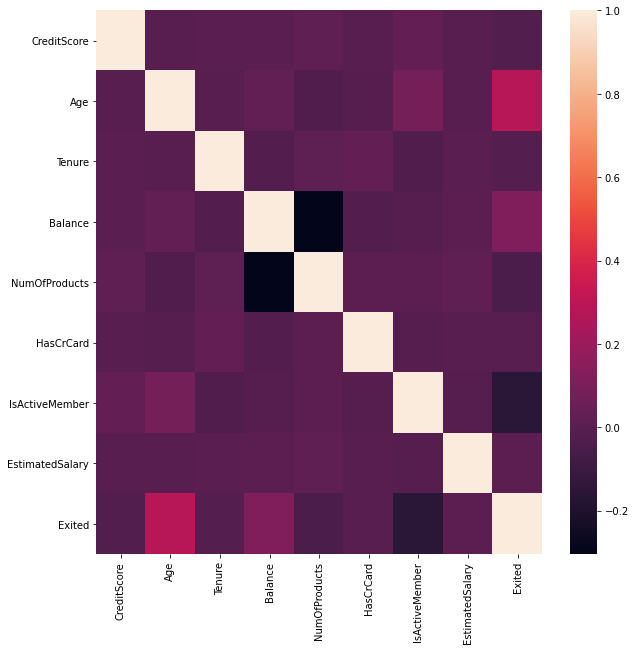

In [ ]:
data_corr = dataset_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data_corr)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

Convert categorical data to numerical data

In [ ]:
Geo_dummies = pd.get_dummies(dataset_df.Geography, drop_first=True)
dataset_df = pd.concat([dataset_df, Geo_dummies], axis=1)
dataset_df= dataset_df.drop(['Geography'], axis=1)
dataset_df.head()
#if germany = 0, spain = 0, then geography is France

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,504,Male,34,0,54980.81,1,1,1,136909.88,0,0,1
1,659,Female,33,7,89939.62,1,1,0,136540.09,0,0,0
2,473,Female,32,5,146602.25,2,1,1,72946.95,0,1,0
3,637,Female,40,6,0.00,2,1,1,181610.60,0,0,1
4,657,Male,75,7,126273.95,1,0,1,91673.60,0,0,1


In [ ]:
Gender_dummies = pd.get_dummies(dataset_df.Gender,prefix = "Sex_", drop_first=True)
dataset_df = pd.concat([dataset_df, Gender_dummies], axis=1)
dataset_df= dataset_df.drop(['Gender'], axis=1)
dataset_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Sex__Male
0,504,34,0,54980.81,1,1,1,136909.88,0,0,1,1
1,659,33,7,89939.62,1,1,0,136540.09,0,0,0,0
2,473,32,5,146602.25,2,1,1,72946.95,0,1,0,0
3,637,40,6,0.00,2,1,1,181610.60,0,0,1,0
4,657,75,7,126273.95,1,0,1,91673.60,0,0,1,1


In [ ]:
dataset_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Sex__Male
0,504,34,0,54980.81,1,1,1,136909.88,0,0,1,1
1,659,33,7,89939.62,1,1,0,136540.09,0,0,0,0
2,473,32,5,146602.25,2,1,1,72946.95,0,1,0,0
3,637,40,6,0.00,2,1,1,181610.60,0,0,1,0
4,657,75,7,126273.95,1,0,1,91673.60,0,0,1,1


# **Splitting the data into training and testing sets**

In [ ]:
X = dataset_df.drop('Exited', axis=1)
y = dataset_df['Exited']

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Sex__Male
0,504,34,0,54980.81,1,1,1,136909.88,0,1,1
1,659,33,7,89939.62,1,1,0,136540.09,0,0,0
2,473,32,5,146602.25,2,1,1,72946.95,1,0,0
3,637,40,6,0.00,2,1,1,181610.60,0,1,0
4,657,75,7,126273.95,1,0,1,91673.60,0,1,1


In [ ]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X

array([[-1.51196465e+00, -4.69158938e-01, -1.73180861e+00, ...,
        -5.81455923e-01,  1.75125028e+00,  9.15756970e-01],
       [ 9.19155577e-02, -5.64497068e-01,  6.92238633e-01, ...,
        -5.81455923e-01, -5.71020608e-01, -1.09199278e+00],
       [-1.83274069e+00, -6.59835197e-01, -3.46292463e-04, ...,
         1.71982082e+00, -5.71020608e-01, -1.09199278e+00],
       ...,
       [ 7.33467640e-01,  1.43760366e+00, -3.46292463e-04, ...,
        -5.81455923e-01, -5.71020608e-01,  9.15756970e-01],
       [-5.70331753e-01, -8.50511457e-01,  1.38482356e+00, ...,
         1.71982082e+00, -5.71020608e-01,  9.15756970e-01],
       [-4.26034273e-02, -1.32720211e+00, -3.46292463e-04, ...,
        -5.81455923e-01,  1.75125028e+00,  9.15756970e-01]])

In [ ]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Exited, dtype: int64

In [ ]:
y = y.values
y

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)

In [ ]:
X_train.shape

(7200, 11)

In [ ]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(11, input_dim=11, activation="relu"))
model.add(Dense(11, activation="relu"))
model.add(Dense(2, activation="softmax"))

In [126]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [124]:
model = Sequential()
model.add(Dense(11, input_dim=11, activation="relu"))
model.add(Dense(11, activation="relu"))
model.add(Dense(2, activation="softmax"))

In [ ]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(11, input_dim=11, activation="relu"))
model.add(Dense(11, activation="relu"))
model.add(Dense(2, activation="softmax"))

In [127]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100


ValueError: ignored

In [122]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [120]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)
# Call model on a test input
x = tf.ones((3, 3))
y = model(x)

In [121]:
# Create 3 layers
layer1 = layers.Dense(11, activation="relu", name="layer1")
layer2 = layers.Dense(12, activation="relu", name="layer2")
layer3 = layers.Dense(4, name="layer3")

# Call layers on a test input
x = tf.ones((3, 3))
y = layer3(layer2(layer1(x)))